In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
print(os.listdir("../input"))


['cityofla']


# Job Bulletiens

In [2]:
job_path = "../input/cityofla/CityofLA/Job Bulletins/"
job_files = os.listdir(job_path)
print("No of files in Job Bulletins Folder ",len(job_files))

No of files in Job Bulletins Folder  683


## Lets visualize a single file

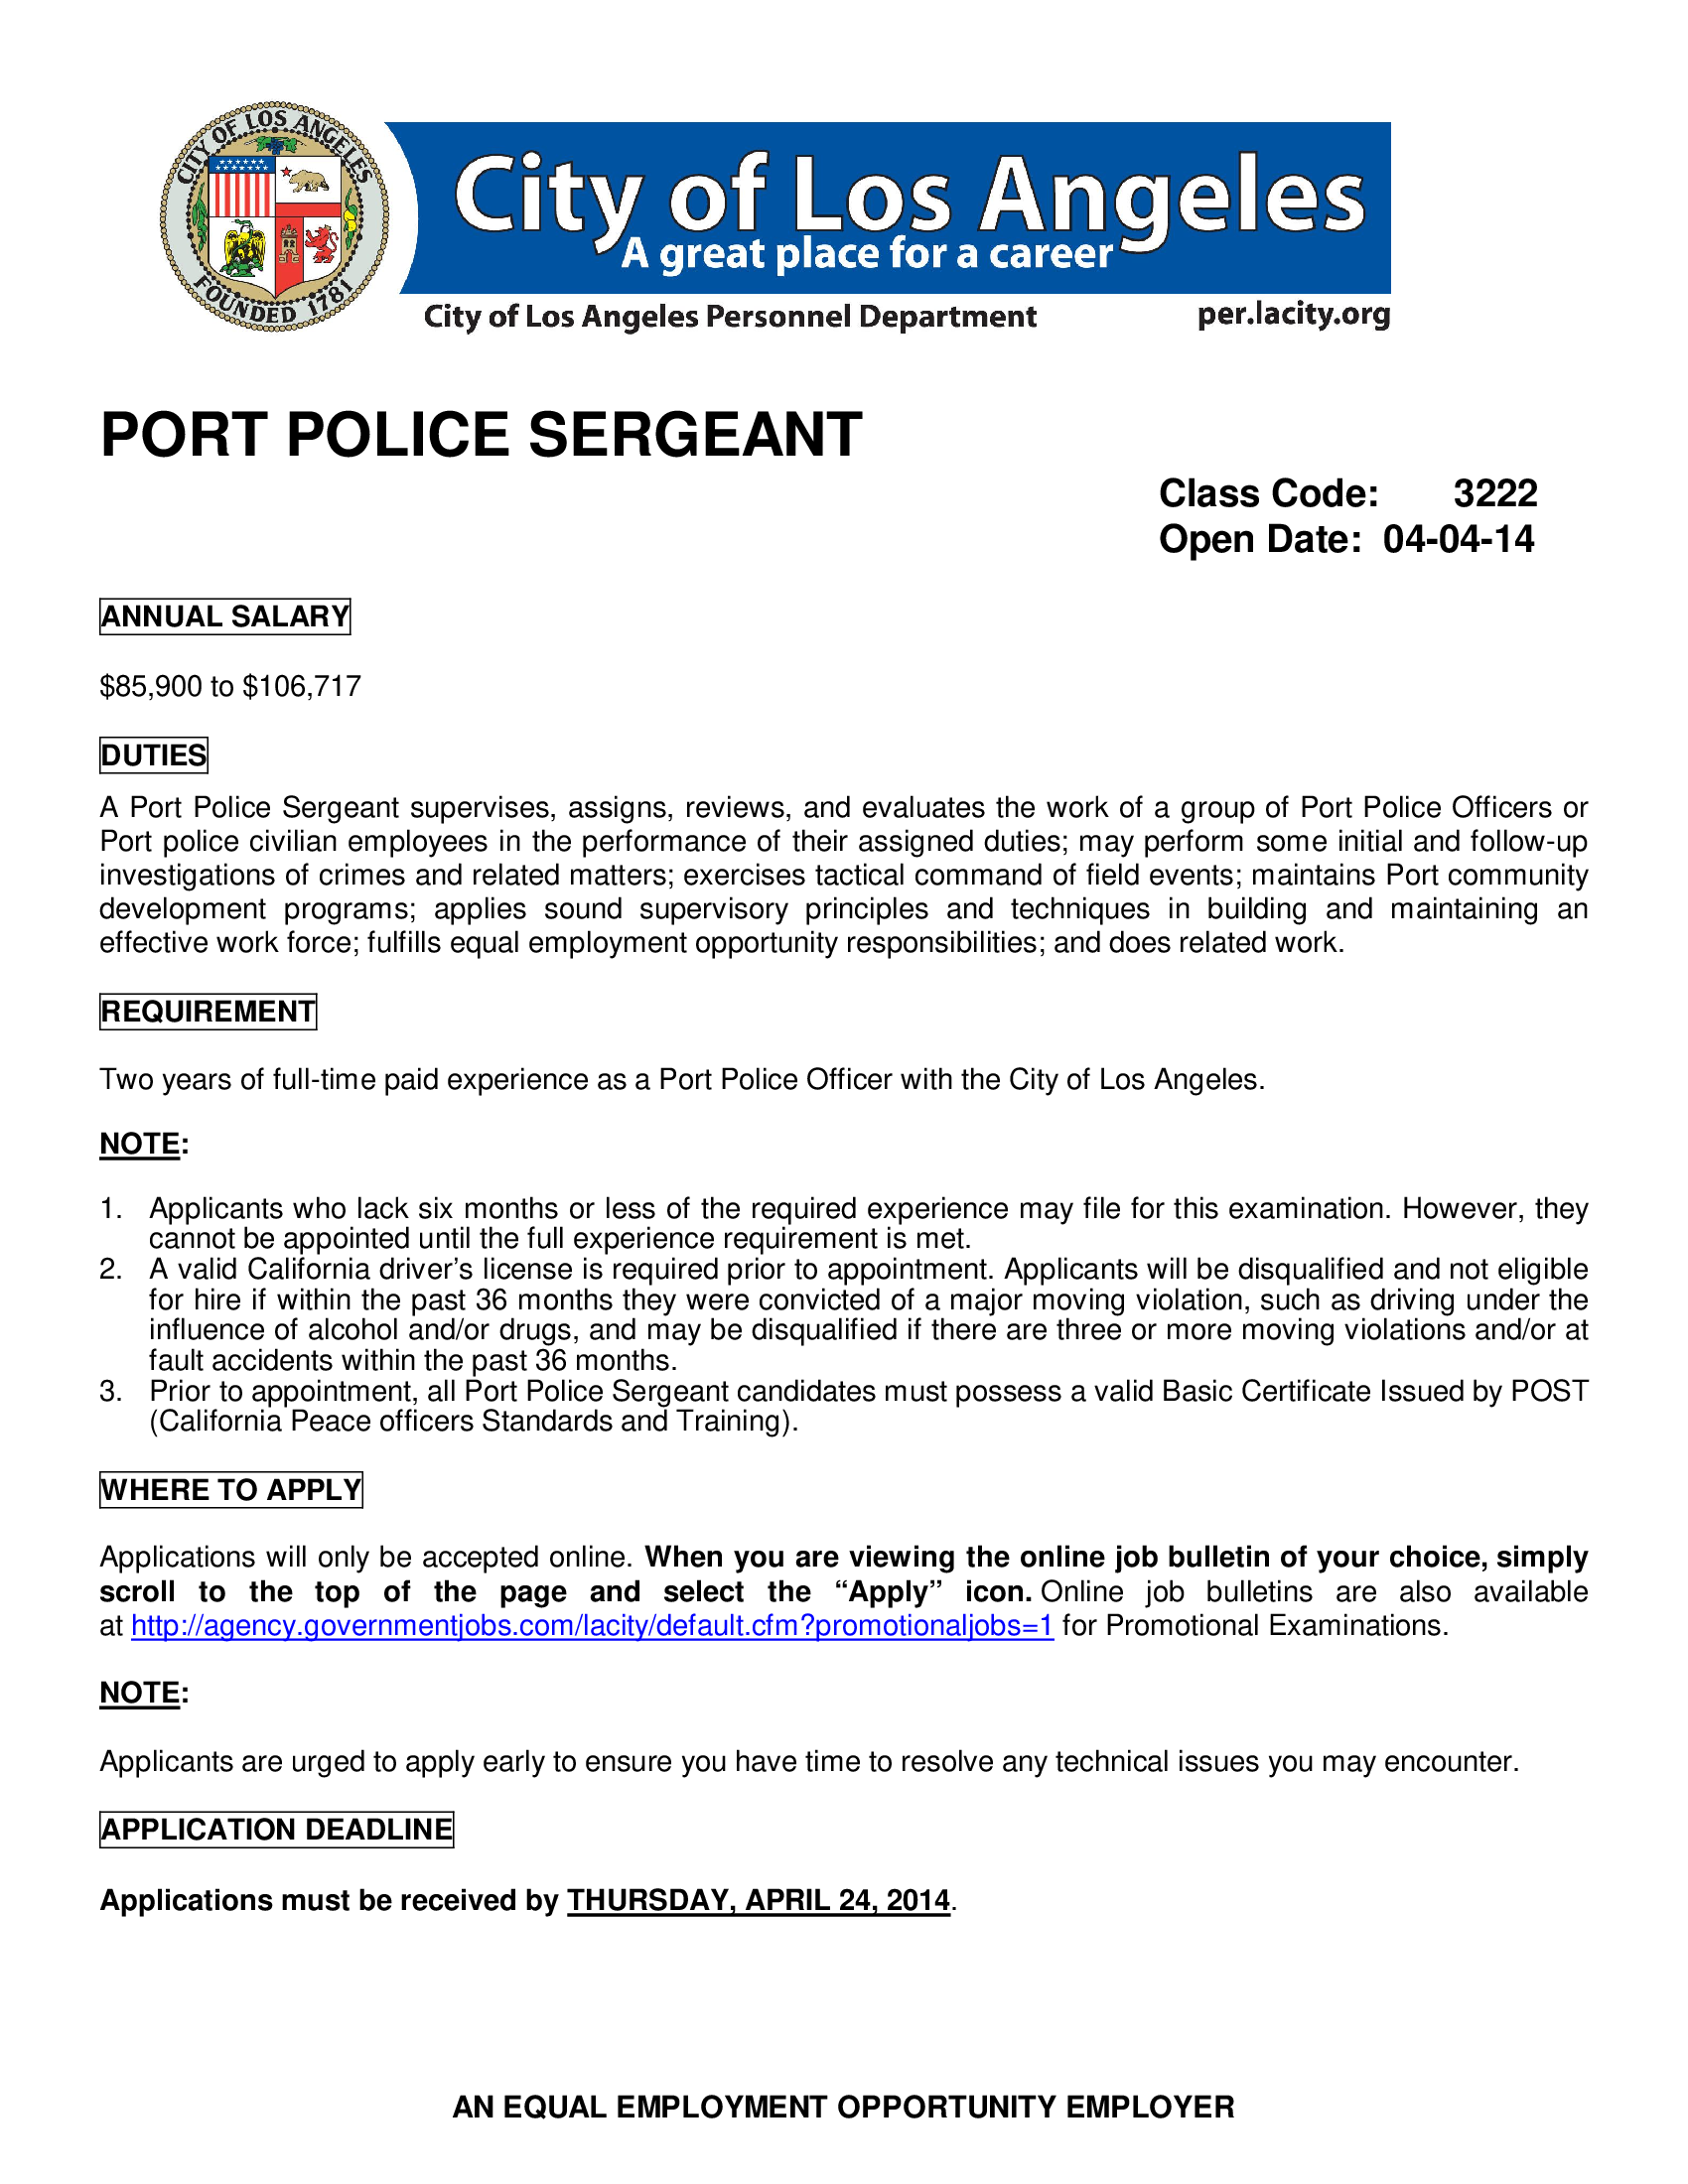

In [16]:
from wand.image import Image as Img
pdf = '../input/cityofla/CityofLA/Additional data/PDFs/2014/April 2014/040414/PORT POLICE SERGEANT 3222.pdf'
Img(filename=pdf, resolution=200)

## Lets Print the single PDF File

In [3]:
with open(job_path+job_files[0]) as file:
    print("File name: ",file.name)
    print("******************")
    print(file.read())

File name:  ../input/cityofla/CityofLA/Job Bulletins/PARK MAINTENANCE SUPERVISOR 3145 102618.txt
******************
PARK MAINTENANCE SUPERVISOR

Class Code:       3145
Open Date:  10-26-18
(Exam Open to Current City Employees)

ANNUAL SALARY

$51,448 to $75,188
The salary in the Department of Water and Power is $83,728 to $88,405 and $87,341 to $92,206

NOTES:

1. For information regarding reciprocity between the City of Los Angeles departments and LADWP, go to http://per.lacity.org/Reciprocity_CityDepts_and_DWP.pdf.
2. Candidates from the eligible list are normally appointed to vacancies in the lower pay grade positions.
3. Annual salary is at the start of the pay range. The current salary range is subject to change. Please confirm the starting salary with the hiring department before accepting a job offer.

DUTIES

A Park Maintenance Supervisor directly supervises a group of employees engaged in grounds and/or golf course maintenance, building custodial maintenance, or landscaping; o

In [4]:
## Let consider only Class Code,Open Date value in the text file

In [21]:
with open(job_path+job_files[0]) as file:
    
    text=file.read()
    
    title          = text.split("Class Code:")[0].strip()
    
    class_code     = text.split("Class Code:")[1].split("Open Date")[0].strip()
    
    open_date      = text.split("Open Date:")[1].split("(")[0].strip()
    open_date      = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{2})", open_date).group()
    
    annual_salary  = text.split("ANNUAL SALARY")[1].split("NOTES")[0].strip()
    annual_salary  = re .split(r'\r\n|\r|\n', annual_salary, flags=re.M)[0].strip()
    
    requirment     = text.split("REQUIREMENTS/MINIMUM QUALIFICATIONS")[1].split("PROCESS NOTES")[0].strip()
    
    where_to_apply     = text.split("WHERE TO APPLY")[1].split("NOTE:")[0].strip()
    
    application_deadine = " ".join(text.split("APPLICATION DEADLINE")[1].splitlines(0)[:4])
    
    
    print("Title: ", title)
    print("Class code: ", class_code)
    print("Open date: ",open_date)
    print("Annual salary: ",annual_salary)
    print("Requirment: ", requirment)
    print("Where to Apply: ", where_to_apply)
    print("Application DeadLine ", application_deadine)

Title:  PARK MAINTENANCE SUPERVISOR
Class code:  3145
Open date:  10-26-18
Annual salary:  $51,448 to $75,188
Requirment:  1. Two years of full-time paid experience as an Irrigation Specialist, Senior Gardener or in a class at that level and which provides experience in supervision of employees engaged in gardening; or
2. One year full-time paid experience as noted above and one year education (30 semester units or 45 quarter units) at an accredited college or university with at least 12 semester or 18 quarter units in horticulture, botany, or a related field.
Where to Apply:  Applications will only be accepted on-line. When you are viewing the on-line job bulletin of your choice, simply scroll to the top of the page and select the "Apply" icon. On-line job bulletins are also available at https://www.governmentjobs.com/careers/lacity/promotionaljobs for Promotional Examinations.
Application DeadLine    Applications must be received by THURSDAY, NOVEMBER 8, 2018. 


## Lets make a dataframe to store the open date and close code from all the file


In [22]:
data=[]
for i in job_files:
    with open(job_path+i) as file:
        filename=str(file.name).split("/")[-1]
        try:
            text=file.read()
            
            title      = text.split("Class Code:")[0].strip()
            
            class_code = text.split("Class Code:")[1].split("Open Date")[0].strip()
            
            open_date  = text.split("Open Date:")[1].split("(")[0].strip()
            open_date  = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{2})", open_date).group()
            
            annual_salary  = text.split("ANNUAL SALARY")[1].split("NOTES")[0].strip()
            annual_salary  =  re .split(r'\r\n|\r|\n', annual_salary, flags=re.M)[0].strip()
            
            requirment     = text.split("REQUIREMENTS/MINIMUM QUALIFICATIONS")[1].split("PROCESS NOTES")[0].strip()
            
            application_deadine = " ".join(text.split("APPLICATION DEADLINE")[1].splitlines(0)[:4])
            
            
            
            data.append([filename,title,class_code,open_date,annual_salary,requirment,application_deadine])
        except Exception as e:
            print(filename)



ENVIRONMENTAL ENGINEER  7872 082616 REV 090116.txt
DEPARTMENTAL CHIEF ACCOUNTANT 1593 111717 revised 11.21.txt
AUDITOR 1517 031816 (1).txt
SENIOR ELECTRICAL MECHANIC 3834 060217 (2) REVISED.txt
REPROGRAPHICS SUPERVISOR  3163 091517.txt
PORT POLICE OFFICER 3221 110906 Rev 060115.txt
PARKING ENFORCEMENT MANAGER 9025 021916 rev022516.txt
PRINCIPAL ANIMAL KEEPER 4312 070618.txt
EXAMINER OF QUESTIONED DOCUMENTS 3229 120415.txt
UTILITY EXECUTIVE SECRETARY 1336 042817 (1).txt
STREET SERVICES INVESTIGATOR 4283 102315 REV 110315.txt
PORT ELECTRICAL MECHANIC SUPERVISOR 3759 031816.txt
CLAIMS AGENT 1767 020317.txt
CHIEF CLERK PERSONNEL 1260 042117.txt
CHIEF ELECTRIC PLANT OPERATOR 5237 121115.txt
SENIOR COMMUNICATIONS ELECTRICIAN SUPERVISOR 3691 041318.txt
ASPHALT PLANT OPERATOR 4143 102414.txt
COMMERCIAL SERVICE SUPERVISOR  1213 061617.txt
WATER SERVICE SUPERVISOR 3930 012717.txt
TRANSPORTATION ENGINEERING AIDE 7285 100915.txt
SENIOR UTILITY SERVICES SPECIALIST 3753 121815 (1).txt
PORT POLICE LI

PERSONNEL DIRECTOR 1714 050418.txt
STREET LIGHTING ELECTRICIAN SUPERVISOR 3840 031717.txt
CHIEF ADMINISTRATIVE ANALYST 1554 062416.txt
PRINCIPAL COMMUNICATIONS OPERATOR 1458 072514.txt
SENIOR PARK MAINTENANCE SUPERVISOR 3146 101416.txt
PORT POLICE CAPTAIN 3224 110416.txt
HARBOR PLANNING AND ECONOMIC ANALYST 9224 111816 REV 112916.txt
WATER TREATMENT OPERATOR 5885 122118.txt
SENIOR ARCHITECTURAL DRAFTING TECHNICIAN 7208 091418.txt
SENIOR ELECTRICAL ENGINEERING DRAFTING TECHNICIAN 7209 042817 REV 051117.txt
SENIOR FIRE PROTECTION ENGINEER 7981 021916 rev022516.txt
SENIOR MECHANICAL ENGINEERING DRAFTING TECHNICIAN 7210 110416.txt
AQUEDUCT AND RESERVOIR KEEPER 5813 063017 (1).txt
VIDEO TECHNICIAN 6145 012717.txt
ARCHITECTURAL ASSOCIATE 7926 013114 REV 032916.txt
UNDERGROUND DISTRIBUTION CONSTRUCTION SUPERVISOR 3814 121418 REV 122718 (1).txt
PRINCIPAL CIVIL ENGINEER 9489 022318.txt
FIRE SPECIAL INVESTIGATOR 021216.txt
SPECIAL INVESTIGATOR 0602 042216.txt
SENIOR CONSTRUCTION ENGINEER 7289 04

## Convert list into dataframe

In [23]:
df = pd.DataFrame(data)
df.columns = ["File_name", "Title", "Class_code","Open_date","Annual_salary","Requirment","Application_deadine"]
df.drop(['File_name'],inplace=True,axis=1)
df.head()

,Title,Class_code,Open_date,Annual_salary,Requirment,Application_deadine
0,PARK MAINTENANCE SUPERVISOR,3145,10-26-18,"$51,448 to $75,188",1. Two years of full-time paid experience as a...,"Applications must be received by THURSDAY, N..."
1,MOTION PICTURE AND TELEVISION MANAGER,1789,11-17-17,"$120,080 to $175,559",1. Graduation from an accredited four-year col...,Applications and Qualifications Questionnair...
2,HOUSING INVESTIGATOR,8516,06-29-18,"$59,487 to $86,965 and $70,157 to $102,563",1. Graduation from an accredited four-year col...,Applications will only be accepted on-line o...
3,POLICE LIEUTENANT,2232,02-09-18,"$125,572 to $139,916 and $132,546 to $147,663","1. Two years as a Police Sergeant, Police Dete...","Applications must be received by THURSDAY, F..."
4,CITY PLANNER,7944,12-07-18,"$87,236 to $127,555",1. Two years of full-time paid experience as a...,"Applications must be received by THURSDAY, D..."


## dataframe into csv

In [24]:
df.shape

(288, 6)

In [25]:
df.to_csv("job_bulletins.csv")

In [26]:
job_df = pd.read_csv("job_bulletins.csv")
job_df.head()

,Unnamed: 0,Title,Class_code,Open_date,Annual_salary,Requirment,Application_deadine
0,0,PARK MAINTENANCE SUPERVISOR,3145,10-26-18,"$51,448 to $75,188",1. Two years of full-time paid experience as a...,"Applications must be received by THURSDAY, N..."
1,1,MOTION PICTURE AND TELEVISION MANAGER,1789,11-17-17,"$120,080 to $175,559",1. Graduation from an accredited four-year col...,Applications and Qualifications Questionnair...
2,2,HOUSING INVESTIGATOR,8516,06-29-18,"$59,487 to $86,965 and $70,157 to $102,563",1. Graduation from an accredited four-year col...,Applications will only be accepted on-line o...
3,3,POLICE LIEUTENANT,2232,02-09-18,"$125,572 to $139,916 and $132,546 to $147,663","1. Two years as a Police Sergeant, Police Dete...","Applications must be received by THURSDAY, F..."
4,4,CITY PLANNER,7944,12-07-18,"$87,236 to $127,555",1. Two years of full-time paid experience as a...,"Applications must be received by THURSDAY, D..."


## Thank you for reading it. Plz Let me know your thoughts on it. I will keep on update my work on it